## Traffic Data by Neighborhood

#### By Sam Houpt

Dataset: https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh

We will first load in the traffic count data from the .csv file.

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np

traffic_data = gpd.read_file('trafficcount.csv')

traffic_data.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,geometry
0,1011743669,85,1445865260,2019-04-18,2019-04-26,4949,,6,StatTrak,25,...,40.45573295,Polish Hill,7,6,42003060500,6,6,2,2-6,None
1,1026101993,140,1121444006,2019-01-24,,,,,Intersection Study,,...,40.46615676,Central Lawrenceville,7,9,42003090200,2,9,2,3-6,None
2,1032382575,11,1539892711,2018-08-28,2018-09-04,,,,,35,...,40.46071714,Windgap,2,28,42003563000,5,28,6,1-16,None
3,103627606,9,734195080,2018-07-17,2018-08-01,2741,,,StatTrak,25,...,40.43737854,Squirrel Hill South,5,14,42003140800,3,14,4,2-18,None
4,1039546167,144,,,,,,,,,...,40.49079426,Perry North,1,26,42003260200,1,26,1,1-15,None


Next, we'll filter out only the important information.

In [9]:
traffic = pd.DataFrame(columns = ['Average Daily Car Traffic', 'Neighborhood'])
traffic['Average Daily Car Traffic'] = traffic_data['average_daily_car_traffic']
traffic['Neighborhood'] = traffic_data['neighborhood']



Now to sort the data in ascending order to see which neighborhoods have the least average daily car traffic.

First, we need to drop the cells with blank values. We have to use numpy for this dataset because the blank cells are simply empty strings, which Pandas doesn't recognize as having a value of null.

In [4]:
traffic['Average Daily Car Traffic'].replace('', np.nan, inplace = True)
traffic['Neighborhood'].replace('', np.nan, inplace = True)
traffic.dropna(subset = ['Average Daily Car Traffic'], inplace = True)
traffic.dropna(subset = ['Neighborhood'], inplace = True)

Then, we need to replace values in the column with ints instead of Strings so that the sort_values method functions properly.

In [5]:
traffic['Average Daily Car Traffic'] = traffic['Average Daily Car Traffic'].astype(int)
traffic_sorted = traffic.sort_values('Average Daily Car Traffic', ascending = True)
traffic_sorted.head(15)

,Average Daily Car Traffic,Neighborhood
182,23,Central Northside
251,58,East Liberty
307,63,Spring Hill-City View
247,77,Bloomfield
258,79,Highland Park
244,79,Bloomfield
321,109,Marshall-Shadeland
310,115,South Side Flats
318,126,Lincoln Place
158,131,Windgap


But wait, some of these values have duplicate neighborhoods. Here's a quick fix that takes the average daily traffic for all neighborhoods for every day that was recorded. 

In [7]:
traffic_new = traffic_sorted.groupby('Neighborhood').mean()
traffic_final = traffic_new.sort_values('Average Daily Car Traffic', ascending = True)
traffic_final.head(10)

,Average Daily Car Traffic
Neighborhood,
South Side Flats,115.000000
Lincoln Place,126.000000
Lincoln-Lemington-Belmar,195.000000
Fineview,419.000000
Allegheny West,477.000000
New Homestead,666.000000
Overbrook,777.000000
Summer Hill,937.000000
Upper Hill,953.333333


Therefore, South Side Flats is the neighborhood with the least average daily car traffic. 

Let's get a better idea of the best neighborhoods by plotting the top 20 in terms of lowest daily car traffic.

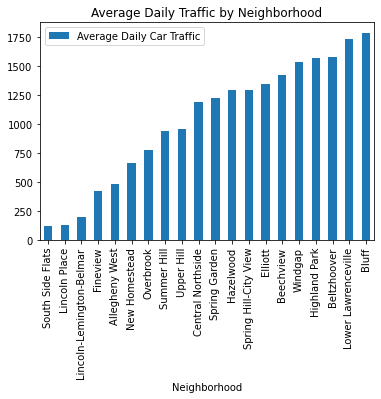

In [8]:
plot = traffic_final.iloc[:20].plot(kind='bar', y='Average Daily Car Traffic', title = 'Average Daily Traffic by Neighborhood')

Here's the bottom 20 neighborhoods:

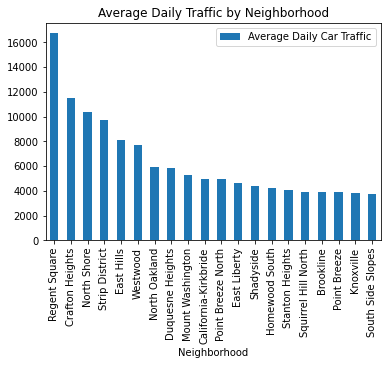

In [62]:
traffic_desc = traffic_final.sort_values('Average Daily Car Traffic', ascending = False)
plot2 = traffic_desc.iloc[:20].plot(kind='bar', y='Average Daily Car Traffic', title = 'Average Daily Traffic by Neighborhood')

Now we'll need to load in the neighborhood data to get a better visualization.

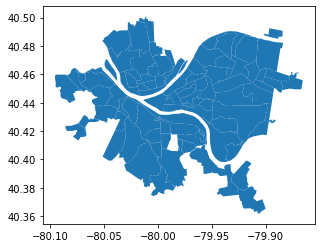

In [81]:
neighborhoods = gpd.read_file('Neighborhoods/Neighborhoods_.shp')
neighborhoods.plot()

Next we merge the car traffic data with the neighborhood shape file.

In [82]:
traffic_map = neighborhoods.merge(traffic_final, how='left', left_on='hood', right_on='Neighborhood')
traffic_map.sort_values(by='Average Daily Car Traffic',ascending = True)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,Average Daily Car Traffic
88,89,16,42,003,170200,1,420031702001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,26083320.0,39308990-70d5-4da6-b2a0-a5510f18e9b9,2.608218e+07,34676.151320,"POLYGON ((-79.97726 40.43272, -79.97725 40.432...",115.0
14,15,246,42,003,310200,4,420033102004,Block Group 4,G5030,S,...,2020-08-14,SDE,2020-08-14,None,27425090.0,8edc0195-2966-4556-a5fd-706c320c0280,2.741909e+07,27506.969838,"POLYGON ((-79.91042 40.37842, -79.91038 40.378...",126.0
21,22,35,42,003,980000,1,420039800001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,7809355.5,c63ba635-c98b-4972-b27a-7202f727a438,5.051180e+07,41668.386653,"MULTIPOLYGON (((-79.90496 40.48522, -79.90470 ...",195.0
89,90,31,42,003,250900,2,420032509002,Block Group 2,G5030,S,...,2020-08-14,SDE,2020-08-14,None,6958774.0,c4f5d2e1-bcd6-4207-bdea-1c369a80ba1d,6.962440e+06,12620.549035,"POLYGON ((-80.00198 40.46814, -80.00129 40.467...",419.0
32,33,152,42,003,562700,1,420035627001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,3938870.2,bf2fe94e-5682-4aac-bded-a8dc3a2b1f88,3.938763e+06,8746.405335,"POLYGON ((-80.00895 40.44996, -80.00894 40.449...",477.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,147,42,003,561700,2,420035617002,Block Group 2,G5030,S,...,2020-08-14,SDE,2020-08-14,None,2871538.2,012c4b53-1895-4d57-a7d7-a6e89ff1d241,2.872020e+06,7445.900720,"POLYGON ((-79.97842 40.40626, -79.97848 40.406...",NaN
74,75,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,10688264.0,b685a912-54de-4e6c-8b17-9128949d51bc,1.068796e+07,19600.573085,"POLYGON ((-80.02999 40.45909, -80.02989 40.458...",NaN
82,83,83,42,003,141100,1,420031411001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,13379806.0,bf45c180-f5c3-4f36-832a-183412108101,1.337930e+07,20794.440321,"POLYGON ((-79.89143 40.42685, -79.89192 40.426...",NaN
84,85,93,42,003,101100,3,420031011003,Block Group 3,G5030,S,...,2020-08-14,SDE,2020-08-14,None,11288746.0,157cd4d5-485c-4a3d-808f-df4b489f95dc,1.129003e+07,19198.863824,"POLYGON ((-79.93866 40.48790, -79.93917 40.487...",NaN


And finally we can plot the traffic map to visualize which areas have the most traffic.

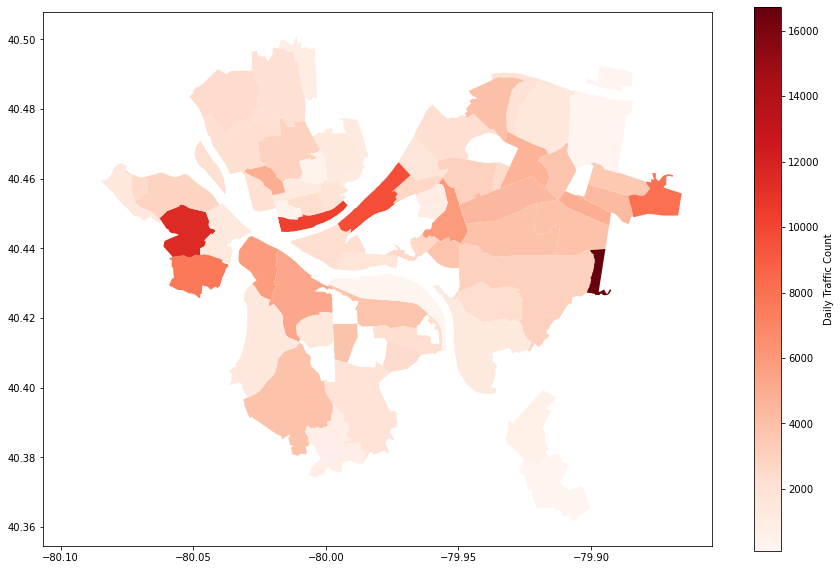

In [83]:
traffic_map.plot(column='Average Daily Car Traffic', cmap='Reds', legend=True, legend_kwds={'label': "Daily Traffic Count"}, figsize=(15, 10), missing_kwds={"color": "white"})